In [123]:
print("Hello World!!")

Hello World!!


# Introduction

This is me starting my very first notebook. Im still a complete beginner, but thats ok!

In [124]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Trying to scarpe data from Bureau of labor Statistics

In [125]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [126]:
#import pandas as pd
#import requests
#from io import StringIO

# URL of the page
#url = "https://www.bls.gov/cps/cpsaat11.htm"

# Read all tables on the page
#tables = pd.read_html(url)

Data to check:
High school enrollment in advanced classes.
https://ocrdata.ed.gov/profile/us/ca?surveyYear=2020&nces=0601650

# Finding the proportions of students enrolled in AP ComSci vs Overall

In [127]:
ap_comsci = pd.read_csv("ap_computer_science_enrollment.csv").drop(columns=['LEA', 'National', 'LEA Female', 'LEA Male'])
ap_comsci

,Group,State
0,American Indian or Alaska Native,45
1,Asian,8015
2,Black or African American,847
3,Hispanic or Latino of any race,8146
4,Native Hawaiian or Other Pacific Islander,133
5,Two or more races,1214
6,White,6934


In [128]:
ap_comsci['Proportion'] = (ap_comsci['State'] / ap_comsci['State'].sum())
ap_comsci_enrollment = ap_comsci.drop(columns=['State'])
ap_comsci_enrollment

,Group,Proportion
0,American Indian or Alaska Native,0.001776
1,Asian,0.316373
2,Black or African American,0.033433
3,Hispanic or Latino of any race,0.321544
4,Native Hawaiian or Other Pacific Islander,0.005250
5,Two or more races,0.047920
6,White,0.273703


In [129]:
overall = pd.read_csv("overall_enrollment.csv").drop(columns=['National','State Female', 'State Male'])
overall

,Group,State
0,American Indian or Alaska Native,"29,770"
1,Asian,"695,162"
2,Black or African American,"310,570"
3,Hispanic or Latino of any race,"3,332,993"
4,Native Hawaiian or Other Pacific Islander,"31,601"
5,Two or more races,"276,894"
6,White,"1,304,480"


In [130]:
overall['State'] = overall['State'].str.replace(',', '')
overall['State'] = pd.to_numeric(overall['State'])
overall['Proportion'] = (overall['State'] / overall['State'].sum())
overall_enrollment = overall.drop(columns=['State'])
overall_enrollment


,Group,Proportion
0,American Indian or Alaska Native,0.004977
1,Asian,0.116219
2,Black or African American,0.051922
3,Hispanic or Latino of any race,0.557220
4,Native Hawaiian or Other Pacific Islander,0.005283
5,Two or more races,0.046292
6,White,0.218087


In [131]:
merged = pd.merge(overall_enrollment, ap_comsci_enrollment, on='Group', how= 'outer', suffixes=('_overall', '_apcomsci'))
merged

,Group,Proportion_overall,Proportion_apcomsci
0,American Indian or Alaska Native,0.004977,0.001776
1,Asian,0.116219,0.316373
2,Black or African American,0.051922,0.033433
3,Hispanic or Latino of any race,0.557220,0.321544
4,Native Hawaiian or Other Pacific Islander,0.005283,0.005250
5,Two or more races,0.046292,0.047920
6,White,0.218087,0.273703


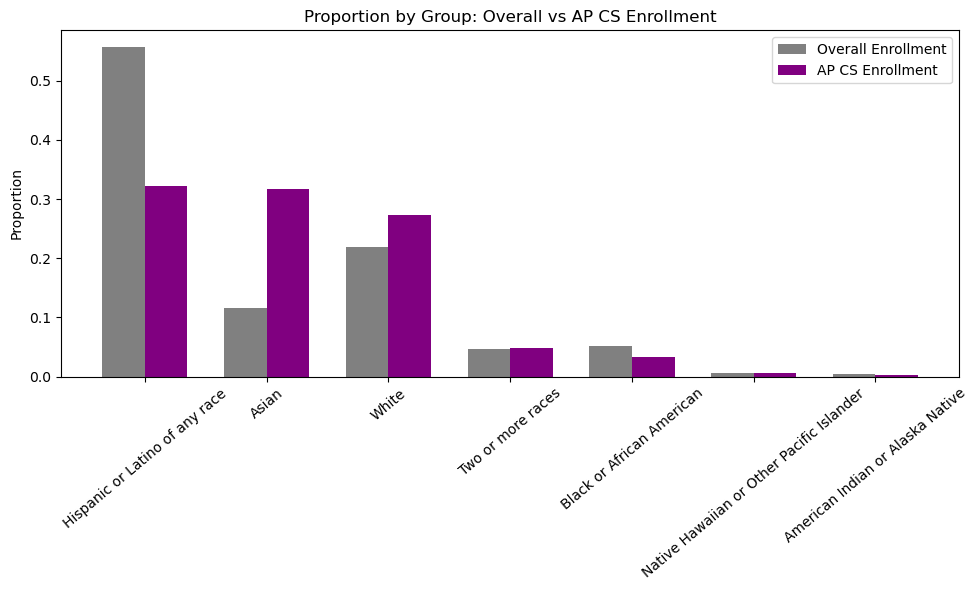

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by Proportion_overall in descending order



groups = merged_sorted['Group']
overall_props = merged_sorted['Proportion_overall']
apcomsci_props = merged_sorted['Proportion_apcomsci']

x = np.arange(len(groups))  
width = 0.35 

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, overall_props, width, label='Overall Enrollment', color='gray')
rects2 = ax.bar(x + width/2, apcomsci_props, width, label='AP CS Enrollment', color='purple')


ax.set_ylabel('Proportion')
ax.set_title('Proportion by Group: Overall vs AP CS Enrollment')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=40)
ax.legend()

plt.tight_layout()
plt.show()


In [133]:
merged['Proportion difference'] = merged['Proportion_apcomsci'] - merged['Proportion_overall']

merged

,Group,Proportion_overall,Proportion_apcomsci,Proportion difference
0,American Indian or Alaska Native,0.004977,0.001776,-0.003201
1,Asian,0.116219,0.316373,0.200154
2,Black or African American,0.051922,0.033433,-0.018489
3,Hispanic or Latino of any race,0.557220,0.321544,-0.235676
4,Native Hawaiian or Other Pacific Islander,0.005283,0.005250,-0.000033
5,Two or more races,0.046292,0.047920,0.001628
6,White,0.218087,0.273703,0.055616


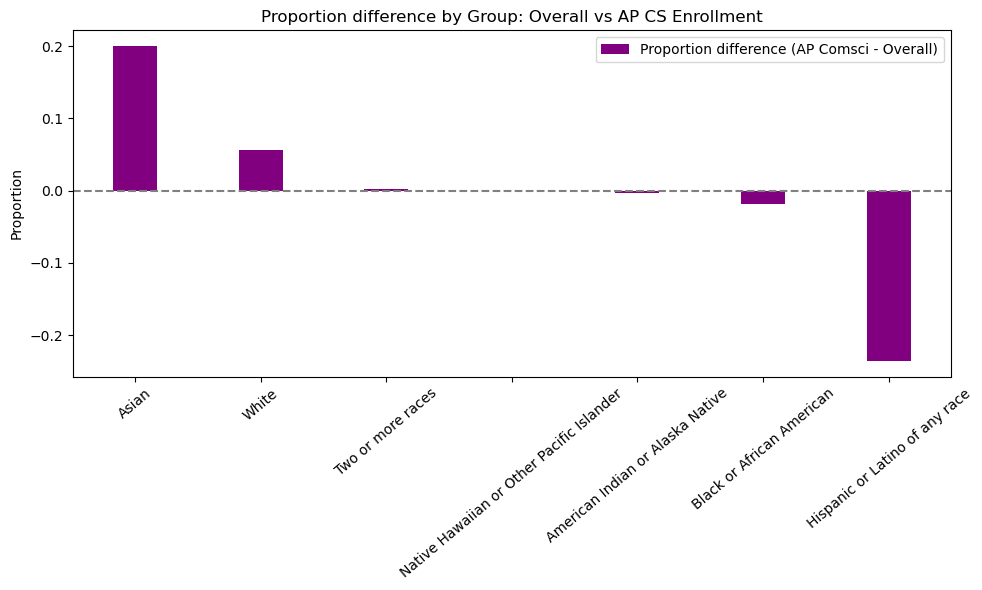

In [134]:
# Sort the DataFrame by Proportion_overall in descending order
merged_sorted = merged.sort_values(by='Proportion difference', ascending=False)

groups = merged_sorted['Group']
difference_props = merged_sorted['Proportion difference']

x = np.arange(len(groups))  
width = 0.35 

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, difference_props, width, label='Proportion difference (AP Comsci - Overall)', color='purple')

ax.axhline(y=0, color='gray', linestyle='--', linewidth=1.5)

ax.set_ylabel('Proportion')
ax.set_title('Proportion difference by Group: Overall vs AP CS Enrollment')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=40)
ax.legend()

plt.tight_layout()
plt.show()

# Cleaning data about graduates in engineering and sciences.

link: https://ncses.nsf.gov/pubs/nsf22310

In [135]:
import pandas as pd

file_path = "engineers_and_scientists_data.csv"

# Skip metadata rows (first 4 lines are titles/notes)
df_clean = pd.read_csv(file_path, skiprows=5)

# Replace special symbols with NaN
df_clean = df_clean.replace(["S", "D"], pd.NA)

# Clean column names
df_clean.columns = df_clean.columns.str.strip()

# Convert numeric columns (everything except first one which is text labels)
for col in df_clean.columns[1:]:
    df_clean[col] = (
        df_clean[col]
        .astype(str)                # ensure string
        .str.replace(",", "", regex=False)  # remove commas in numbers
    )
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

print(df_clean.head())


                                          Unnamed: 0  Unnamed: 1  Unnamed: 2  \
0                             Both sexes, all fields     7466000      564000   
1                                         S&E fields     5709000      453000   
2  Biological, agricultural, and environmental li...      705000       68000   
3                 Computer and mathematical sciences     1670000       99000   
4                      Physical and related sciences      422000       23000   

   American Indian or Alaska Native    Asian  Black or African American  \
0                               NaN  1543000                     379000   
1                            9000.0  1326000                     259000   
2                            1000.0   131000                      24000   
3                               NaN   476000                     107000   
4                               NaN    88000                      12000   

   Native Hawaiian or Other Pacific Islander    White  More than one

In [136]:
df_clean = df_clean.rename(columns={'Unnamed: 0': 'Sex and field of highest degree',
                                    'Unnamed: 1': 'Total',
                                    'Unnamed: 2': 'Hispanic or Latino',
                                    }).iloc[:, :-8]
df_clean

,Sex and field of highest degree,Total,Hispanic or Latino,American Indian or Alaska Native,Asian,Black or African American,Native Hawaiian or Other Pacific Islander,White,More than one race
0,"Both sexes, all fields",7466000,564000,NaN,1543000,379000,17000.0,4784000,158000.0
1,S&E fields,5709000,453000,9000.0,1326000,259000,12000.0,3537000,114000.0
2,"Biological, agricultural, and environmental li...",705000,68000,1000.0,131000,24000,NaN,467000,13000.0
3,Computer and mathematical sciences,1670000,99000,NaN,476000,107000,NaN,943000,41000.0
4,Physical and related sciences,422000,23000,NaN,88000,12000,NaN,290000,7000.0
5,Social and related sciences,754000,86000,1000.0,55000,39000,NaN,556000,16000.0
6,Engineering,2159000,176000,4000.0,575000,77000,8000.0,1281000,37000.0
7,S&E-related fields,428000,27000,NaN,94000,26000,NaN,271000,8000.0
8,Non-S&E fields,1330000,85000,NaN,123000,94000,NaN,976000,36000.0
9,Female,2193000,182000,4000.0,488000,135000,3000.0,1322000,58000.0


In [137]:
# Group by the column and sum all numeric columns for each group
merged_df = df_clean.groupby('Sex and field of highest degree', as_index=False).sum(numeric_only=True).set_index('Sex and field of highest degree').T

# If you want to keep non-numeric columns (like labels), you can use .agg() with 'first' for those columns
# merged_df = df_clean.groupby('Sex and field of highest degree', as_index=False).agg('sum', numeric_only=True)

merged_df.to_csv()


',"Biological, agricultural, and environmental life sciences","Both sexes, all fields",Computer and mathematical sciences,Engineering,Female,Male,Non-S&E fields,Physical and related sciences,S&E fields,S&E-related fields,Social and related sciences\nTotal,1410000.0,7466000.0,3340000.0,4318000.0,2193000.0,5274000.0,2660000.0,844000.0,11418000.0,856000.0,1508000.0\nHispanic or Latino,136000.0,564000.0,199000.0,352000.0,182000.0,382000.0,169000.0,47000.0,906000.0,54000.0,171000.0\nAmerican Indian or Alaska Native,1000.0,0.0,0.0,7000.0,4000.0,0.0,0.0,0.0,18000.0,0.0,2000.0\nAsian,262000.0,1543000.0,953000.0,1150000.0,488000.0,1055000.0,246000.0,176000.0,2652000.0,189000.0,110000.0\nBlack or African American,47000.0,379000.0,214000.0,155000.0,135000.0,244000.0,187000.0,25000.0,519000.0,52000.0,78000.0\nNative Hawaiian or Other Pacific Islander,0.0,17000.0,0.0,15000.0,3000.0,14000.0,0.0,0.0,24000.0,0.0,0.0\nWhite,934000.0,4784000.0,1886000.0,2561000.0,1322000.0,3461000.0,1952000.0,580000.0,7

In [138]:
com_sci_and_math = df_clean[df_clean['Sex and field of highest degree'] == 'Computer and mathematical sciences']
com_sci_and_math

,Sex and field of highest degree,Total,Hispanic or Latino,American Indian or Alaska Native,Asian,Black or African American,Native Hawaiian or Other Pacific Islander,White,More than one race
3,Computer and mathematical sciences,1670000,99000,NaN,476000,107000,NaN,943000,41000.0
12,Computer and mathematical sciences,396000,16000,NaN,171000,28000,NaN,172000,8000.0
21,Computer and mathematical sciences,1274000,84000,NaN,306000,79000,NaN,771000,33000.0


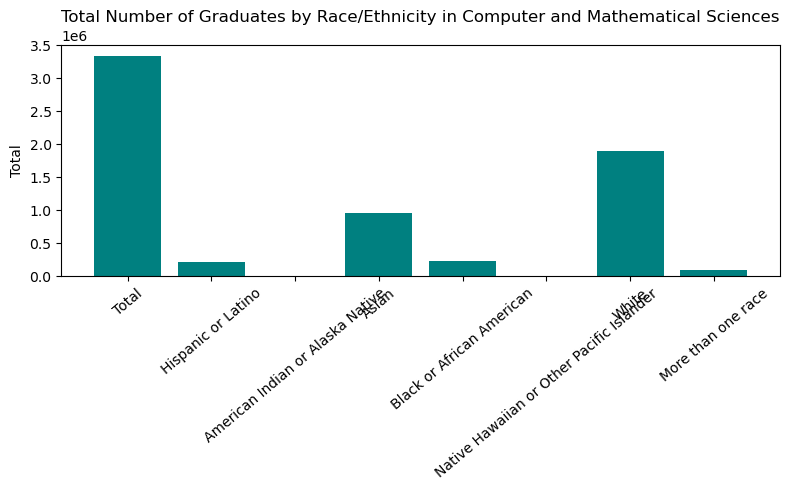

In [139]:
# Sum all numeric columns to combine all three rows into one
combined_row = com_sci_and_math.select_dtypes(include='number').sum()

# Add a label for the combined row
combined_row['Sex and field of highest degree'] = 'All (Computer and mathematical sciences)'

# Convert to a DataFrame with one row
combined_table = pd.DataFrame([combined_row])

# Reorder columns if needed (put label first)
cols = ['Sex and field of highest degree'] + [col for col in combined_table.columns if col != 'Sex and field of highest degree']
combined_table = combined_table[cols]

combined_table

# Bar chart with totals for each race/ethnicity from combined_table

# Exclude the label column to get only the totals for each group
race_columns = [col for col in combined_table.columns if col != 'Sex and field of highest degree']
totals = combined_table[race_columns].iloc[0]

plt.figure(figsize=(8,5))
plt.bar(race_columns, totals, color='teal')
plt.ylabel('Total')
plt.title('Total Number of Graduates by Race/Ethnicity in Computer and Mathematical Sciences')
plt.xticks(rotation=40)
plt.tight_layout()

In [140]:
df_clean.to_csv('df_clean_export.csv', index=False)

# Cleaning female vs male STEM salary data

In [175]:
wages = pd.read_csv("Median_annual_salaries.csv", skiprows=3)
wages

,Highest degree field and sex,Unnamed: 1,1995,2003,2019
0,S&E,Female,"47,000","55,000","57,000"
1,NaN,Male,"69,000","83,000","86,000"
2,S&E-related,Female,NaN,"63,000","68,000"
3,NaN,Male,NaN,"92,000","86,000"


In [176]:
wages['Highest degree field and sex'] = wages['Highest degree field and sex'].ffill()


In [143]:
wages = wages.rename(columns = {'Unnamed: 1': 'Sex', 'Highest degree field and sex': 'Highest degree field'})

In [144]:
wages

,Highest degree field,Sex,1995,2003,2019
0,S&E,Female,"47,000","55,000","57,000"
1,S&E,Male,"69,000","83,000","86,000"
2,S&E-related,Female,NaN,"63,000","68,000"
3,S&E-related,Male,NaN,"92,000","86,000"


In [ ]:
wages_melted = wages.melt(
    id_vars=["Highest degree field", "Sex"],  # identifiers
    value_vars=["1995", "2003", "2019"],      # melt year columns
    var_name="Year",                          # new column for  years
    value_name="Wages"                        # 
)


wages_melted["Wages"] = (
    wages_melted["Wages"]
    .replace({",": ""}, regex=True)   # remove commas

wages_melted

,Highest degree field,Sex,Year,Wages
0,S&E,Female,1995,47000
1,S&E,Male,1995,69000
2,S&E-related,Female,1995,NaN
3,S&E-related,Male,1995,NaN
4,S&E,Female,2003,55000
5,S&E,Male,2003,83000
6,S&E-related,Female,2003,63000
7,S&E-related,Male,2003,92000
8,S&E,Female,2019,57000
9,S&E,Male,2019,86000


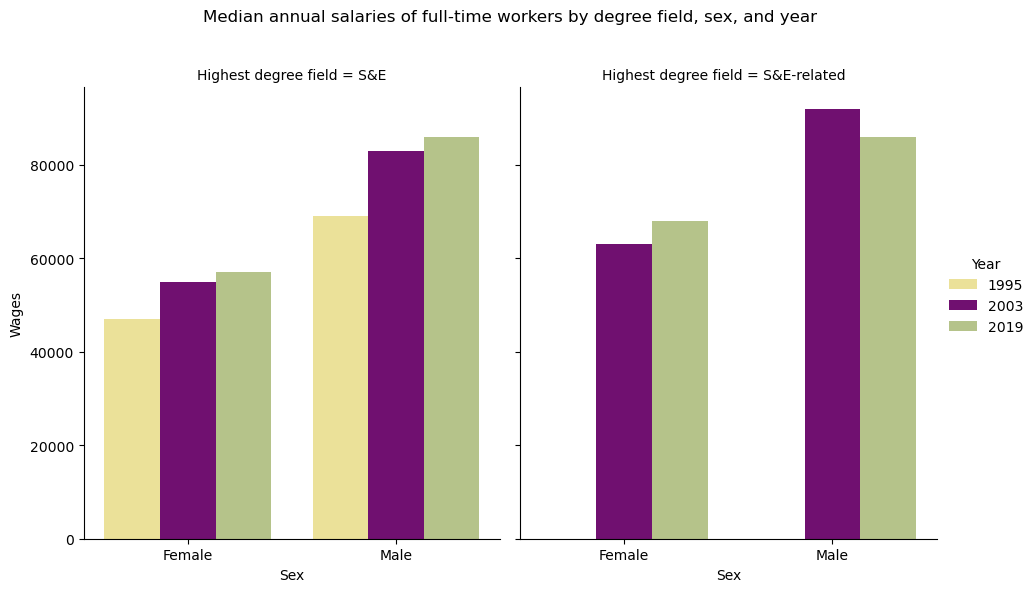

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Wages to numeric (in case they are still strings)
wages_melted["Wages"] = pd.to_numeric(wages_melted["Wages"], errors="coerce")


custom_palette = {
    "1995": "#f8eb8c",  # yellow
    "2003": "purple",  
    "2019": "#bacc81"   # green
}
# Create grouped bar plot
sns.catplot(
    data=wages_melted,
    x="Sex", 
    y="Wages", 
    hue="Year", 
    col="Highest degree field", 
    kind="bar",
    height=6, 
    aspect=0.8,
    palette= custom_palette  # you can choose other palettes too
)

plt.subplots_adjust(top=0.85)
plt.suptitle("Median annual salaries of full-time workers by degree field, sex, and year")

plt.show()



https://www.pewresearch.org/science/2022/06/14/many-hispanic-americans-see-more-representation-visibility-as-helpful-for-increasing-diversity-in-science/

In [ ]:
wages_melted.to_csv('wages_by_sex.csv', index=False)

In [196]:
wages_by_ethnicity = pd.read_csv('Median_salary by race and ethnicity.csv', skiprows=2).drop('Unnamed: 4', axis=1).replace('s', np.nan).iloc[:8].drop(0)
wages_by_ethnicity

,Highest degree field and race or ethnicity,1995,2003,2019
1,American Indian or Alaska Native,NaN,"58,000","59,000"
2,Asian,"45,000","78,000","91,000"
3,Black or African American,"35,000","58,000","55,000"
4,Hispanic or Latino,"38,000","61,000","59,000"
5,Native Hawaiian or Other Pacific Islander,NaN,"68,000","91,000"
6,White,"45,000","73,000","75,000"
7,More than one race,NaN,"61,000","66,000"


In [ ]:
wages_by_ethnicity[["1995", "2003", "2019"]] = (
    wages_by_ethnicity[["1995", "2003", "2019"]].replace({",": ""}, regex=True)
)

wages_by_ethnicity

wages_by_ethnicity = wages_by_ethnicity.sort_values(by='2019', ascending=False)


,Highest degree field and race or ethnicity,1995,2003,2019
1,American Indian or Alaska Native,NaN,58000,59000
2,Asian,45000,78000,91000
3,Black or African American,35000,58000,55000
4,Hispanic or Latino,38000,61000,59000
5,Native Hawaiian or Other Pacific Islander,NaN,68000,91000
6,White,45000,73000,75000
7,More than one race,NaN,61000,66000


In [205]:

long_df = wages_by_ethnicity.melt(
    id_vars='Highest degree field and race or ethnicity',
    value_vars=['1995', '2003', '2019'],
    var_name='Year',
    value_name='Wage'
)

# Convert the 'Year' column to a string type to treat it as a categorical variable
long_df['Year'] = long_df['Year'].astype(str)

# Display the new, long format DataFrame
long_df

,Highest degree field and race or ethnicity,Year,Wage
0,American Indian or Alaska Native,1995,NaN
1,Asian,1995,45000
2,Black or African American,1995,35000
3,Hispanic or Latino,1995,38000
4,Native Hawaiian or Other Pacific Islander,1995,NaN
5,White,1995,45000
6,More than one race,1995,NaN
7,American Indian or Alaska Native,2003,58000
8,Asian,2003,78000
9,Black or African American,2003,58000


<built-in function sorted>


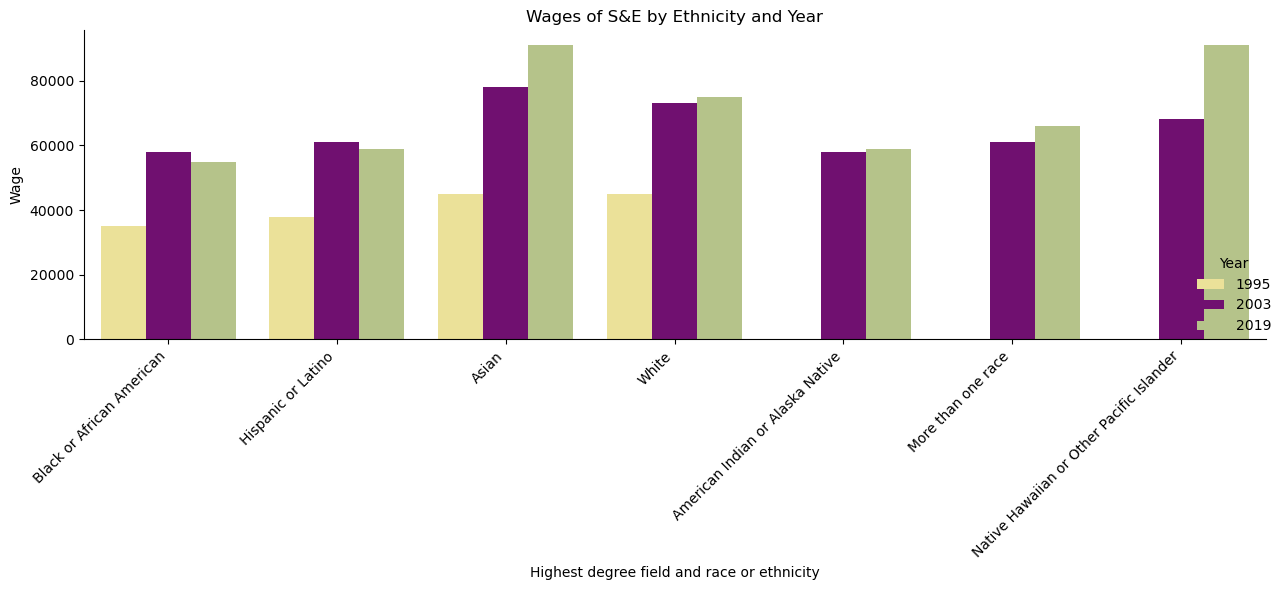

In [228]:
# Create the bar plot using sns.catplot


custom_palette = {
    "1995": "#f8eb8c",  # yellow
    "2003": "purple",  
    "2019": "#bacc81"   # green
}
# Display the sorted DataFrame
print(sorted)
long_df["Wage"] = pd.to_numeric(long_df["Wage"], errors="coerce")

sns.catplot(
    x='Highest degree field and race or ethnicity',
    y='Wage',
    hue='Year',
    kind='bar',
    data=long_df,
    height=6, 
    aspect=2,
    palette= custom_palette,  
    hue_order= ['1995', '2003', '2019']
)

# Add title and adjust x-axis labels
plt.title('Wages of S&E by Ethnicity and Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

Data Source: https://ncses.nsf.gov/pubs/nsb20245/representation-of-demographic-groups-in-stem